In [1]:
import rubik_cube as rc
import importlib
importlib.reload(rc)

<module 'rubik_cube' from '/home/ouadie/workspace/personal/pythonWorkspace/initialProj/rubik_cube.py'>

## I. Demos & Examples
### I.1 3D Cube

By default, `RubikCube` class has a default constructor expecting the dimension of the cube, which defaults to `dim=3` *(equivalent to 3x3 standard Rubik's Cube)*.  

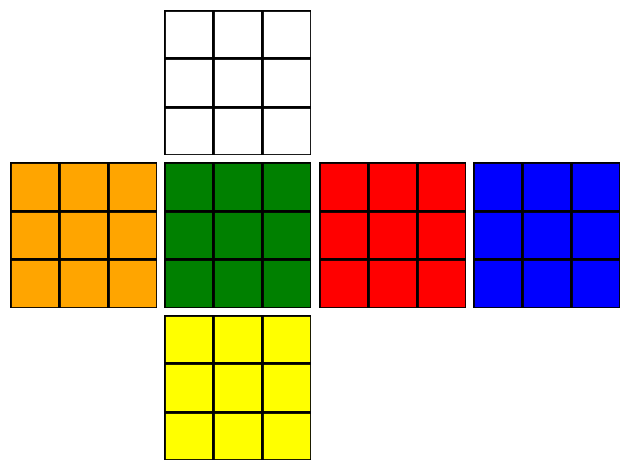

In [2]:
# 3D Cube instatiation & display
My3DCube = rc.RubikCube()
My3DCube.display()

The layout above is a widely adopted flat representation of the 3D cube, which corresponds to a reality-like flattening of the cube starting from the Front face *(Green in our case)* : 

- F *(Front - Green)* : The face currently facing the user.
- B *(Back - Blue)* : The face opposite to the front.
- U *(Up - White)* : The face on top of the cube.
- D *(Down - Yellow)* : The face on the bottom of the cube.
- L *(Left - Orange)* : The face to the left side of the front face.
- R *(Right - Red)* : The face to the right side of the front face.

For debugging/investigation purposes, you can use `print_all_faces()` as well to display a numerical version of the previous figure.

In [3]:
My3DCube.print_all_faces()

FaceId 0:
[0 0 0]
[0 0 0]
[0 0 0]
FaceId 1:
[1 1 1]
[1 1 1]
[1 1 1]
FaceId 2:
[2 2 2]
[2 2 2]
[2 2 2]
FaceId 3:
[3 3 3]
[3 3 3]
[3 3 3]
FaceId 4:
[4 4 4]
[4 4 4]
[4 4 4]
FaceId 5:
[5 5 5]
[5 5 5]
[5 5 5]


### I.2 Initial state
When first instantiated, the Cube is in a "Solved" state, corresponding to a uniform distribution of Cubies colors within their containing faces.

In [4]:
# Returns true if the Cube is in its solved state
My3DCube.is_solved()

True

This initial state also corresponds to 0 (int) moves-count as no rotation has been applied to the cube, the log of the applied algorithms (str) is empty as well for the same reason. 

In [5]:
print(f"Instruction history count : {My3DCube.get_alg_count()}")
print(f"Instruction history log : {My3DCube.get_alg_log()}")

Instruction history count : 0
Instruction history log : 


### I.3 Algorithms
In the context of solving a Rubik's Cube, an "algorithm" refers to a predefined sequence of moves that achieves a specific outcome on the cube. These sequences are designed to manipulate certain pieces of the cube into desired positions and orientations. 

#### A. Applying elementary moves
The basic moves we can apply to a Cube are rotations of faces *(or inner-layers for dimensions > 3x3)* folowing one of the three axes x, y or z. These moves change alter the state of the cube and result in a new **permutation**.  
The common way to describe such moves is to specify :
- The face along which the rotation will be applied *(each face corresponds to one 3D axis)*
- The turn sign in term of Clockwise *(+90 degrees)* or Counterclockwise *(-90 degrees)*
- *(If dimension > 3x3)* The cube layer to turn, whether it's an outer layer (face) or an inner one. 

Following the faces notations formerly introduced, the commonly used move notation for 3x3 Rubik's Cube is : 
- Capital letter of the face : Clockwise 90 degrees rotation of that face *(e.g. move="B")*.
- Capital letter of the face + ' : Counterclockwise 90 degrees rotation of that face *(e.g. move="U'")*.
- Capital letter of the face + 2 : 180 rotation of that face *(e.g. move="F2")*

**Note** : 
Given its odd-dimension, the standard Rubik's Cube faces have fixed center cubies that serve as a reference to the colour the whole face should have in a solved state. This the inner layers *(3 in total)* along with their centers *(6 in total)* are not meant to be moved. 

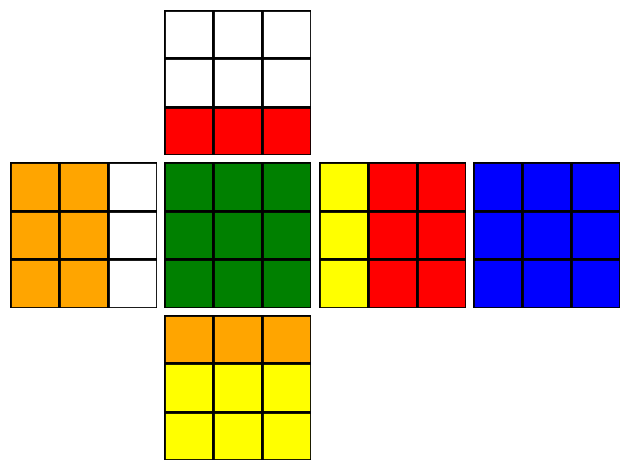

In [6]:
# Example of turning the front face Counterclockwise
# Affected faces are the adjacent ones, namely U,L,D and R
My3DCube.apply_algorithm("F'")
My3DCube.display()

The inner state of the cube is updated and so is the solving state and the algorithm's steps-count and log : 

In [7]:
print(f"New algorithm history count : {My3DCube.get_alg_count()}")
print(f"New algorithm history log : {My3DCube.get_alg_log()}")
print(f"Cube solved ? : {My3DCube.is_solved()}")

New algorithm history count : 1
New algorithm history log : F'
Cube solved ? : False


#### B. Applying elementary moves
In order to apply serie of moves *(bulk algorithm)*, we pass a serie of elementary instructions (str) separated by a semicolon";" to the `apply_algorithm` method. In the following example we apply : 
- "U" : Clockwise turn of the Upper face
- "L2" : Double turn of the Left face
- "D'" : Counterclockwise turn of the Down face

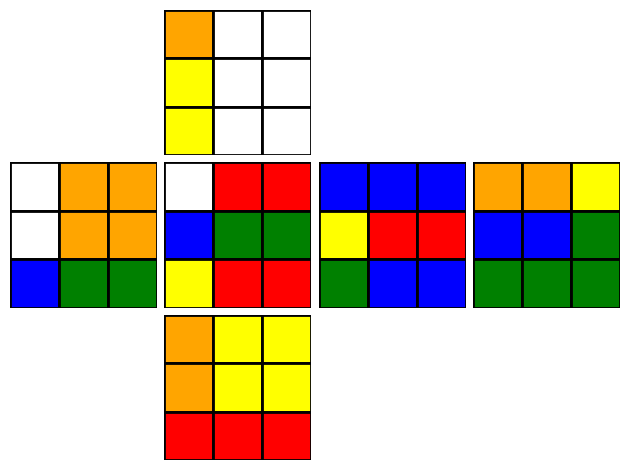

In [8]:
# Applying more moves 
My3DCube.apply_algorithm("U;L2;D'")
My3DCube.display()

In [9]:
print(f"New algorithm history count : {My3DCube.get_alg_count()}")
print(f"New algorithm history log : {My3DCube.get_alg_log()}")

New algorithm history count : 4
New algorithm history log : F';U;L2;D'


#### C. Reversing moves
In order to reverse moves, one can call `reverse_back(steps : int)` with the number of steps to reverse, which will internally compute and **apply** counter-moves up to a depth of `steps` passed by the user. Here is an example of a reversing of the 2 latest moves "L2;D" :  

In [10]:
My3DCube.reverse_back(steps=2)
print(f"After reverse algorithm history count : {My3DCube.get_alg_count()}")
print(f"After reverse algorithm history log : {My3DCube.get_alg_log()}")

After reverse algorithm history count : 6
After reverse algorithm history log : F';U;L2;D';D;L2


Reverse operations are appended to the log and not removed/dequeued. If you want to reset the whole cube by removing the log and re-initializing the algorithm count, you can call the `reset()` method.

In [11]:
My3DCube.reset()
print(f"After reset algorithm history count : {My3DCube.get_alg_count()}")
print(f"After reset algorithm history log : {My3DCube.get_alg_log()}")

Cube reset successfully!
After reset algorithm history count : 0
After reset algorithm history log : 


#### D. Scrambling the Cube
Scrambling refers to the random shuffling of the cube by applying a serie of random moves to get the cube to a non solved state. This can be achieved through the 

Cube reset successfully!


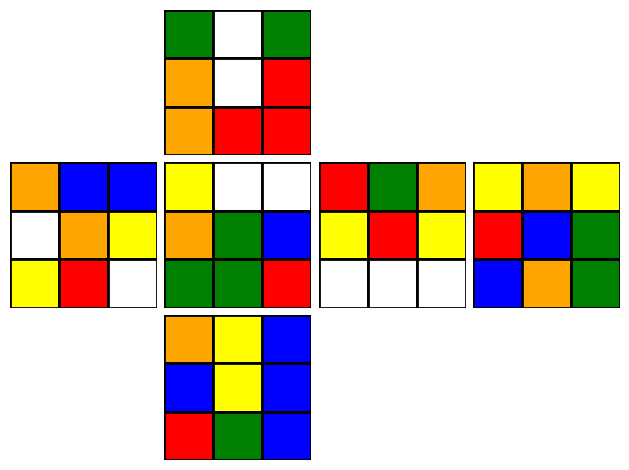

After scrambling from initial state, algorithm history log is : B2;D;U2;L;F';B;U';F;F;D'


In [12]:
# 10-steps scrambling 
My3DCube.reset() # Making sure Cube is in its initial state for a clean log
My3DCube.scramble(steps=10)
My3DCube.display()
print(f"After scrambling from initial state, algorithm history log is : {My3DCube.get_alg_log()}")

### I.3 4D Cube
The 4x4 Rubik's Cube, also known as the **Rubik's Revenge**, is a more complex variant of the standard 3x3 Rubik's Cube. It was invented by *Péter Sebestény* and released in 1981. Here's an overview of its features and the complexity it presents compared to the standard 3x3 cube:
- **Structure**: The 4x4 cube has sixteen squares per face in its 6 faces *(Vs. nine squares in the 3x3)*. This results in a significantly greater number of possible configurations. Thus in term of complexity and while the 3x3 Rubik's Cube has about 43 quintillion possible positions, the 4x4 cube has **7.40 x 10^45** possible positions!
- **No Fixed Centers**: One of the key differences in the 4x4 cube is that it lacks fixed center pieces *(Which is the case for all even-dimensional cubes)*. Unlike the fixed-centers 3x3 Cube, there are four center pieces per face in the 4x4 cube, **none of which are fixed**, adding an extra layer of complexity as one has to determine the correct color arrangement for the centers relatively to other faces.

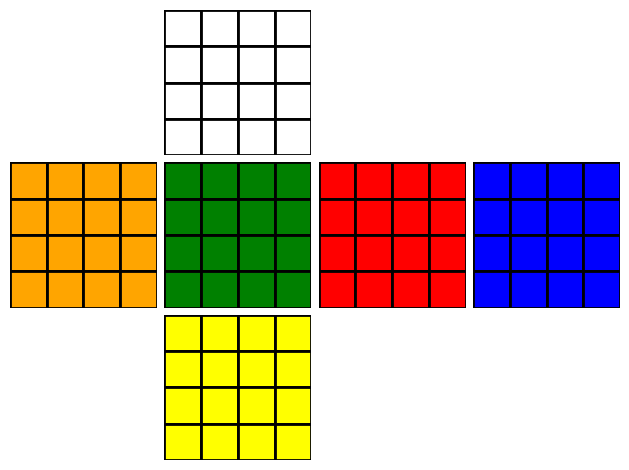

In [13]:
# 3D Cube instatiation & display
My4DCube = rc.RubikCube(dim=4)
My4DCube.display()

All methods and utilities formerly presented with the 3x3 Cube apply to the Rubik's Revenge. However, given that the inner layers of the 4x4 cube are free to move, an extra set of moves notation is introduced to handle these. 

For each face represented by its capital letter *(e.g. F:Front face)*, the lower case version *f* refers to the first inner layer right behind that face. The modifiers introduced previously are valid in these cases as well, so that "f'" refers to the counter-clockwise turn of the inner front layer, and "f2" to the double turn of this layer. Following are some examples : 

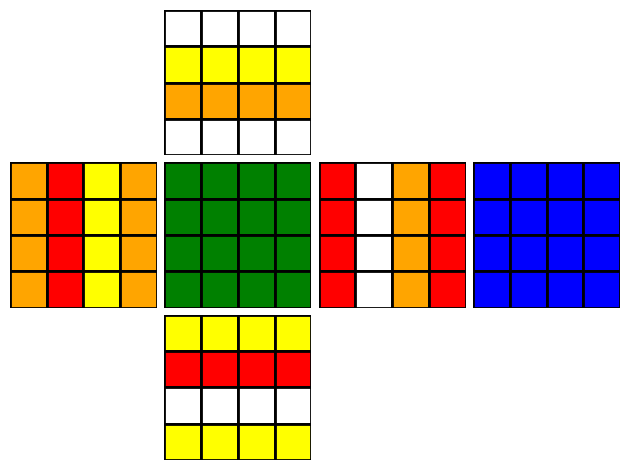

In [14]:
My4DCube.apply_algorithm("f;b2")
My4DCube.display()